<a href="https://colab.research.google.com/github/aniketmondal1210/CodePlayground/blob/main/SVD_IMAGE_Low_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from  matplotlib import pyplot as plt


[[207. 207. 207. ... 244. 244. 244.]
 [207. 207. 208. ... 244. 244. 244.]
 [208. 208. 208. ... 244. 244. 244.]
 ...
 [201. 206. 210. ... 120. 120. 120.]
 [199. 204. 209. ... 121. 121. 120.]
 [191. 197. 202. ... 122. 121. 120.]]


(720, 960)

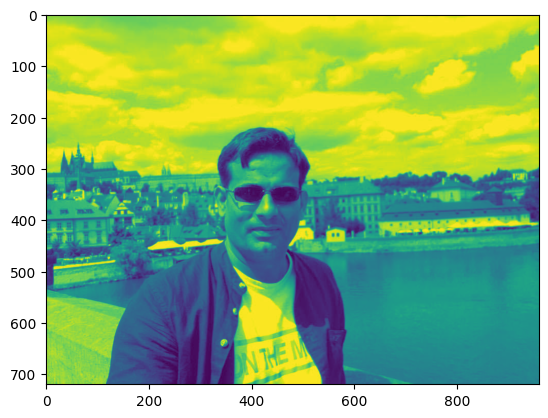

In [ ]:
# TODO: LOAD IMAGE
url = "https://channeli.in/api/django_filemanager/media_files/12069/"
myImg = io.imread(url)
gray_image = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
img_mat = np.array(list(gray_image),float)
print(img_mat)
img_mat.shape
plt.imshow(img_mat)
img_mat.shape

In [ ]:
# Scale the image matrix before SVD
img_mat_scaled = (img_mat - img_mat.mean()) / img_mat.std()

In [ ]:
# Perform SVD using np.linalg.svd
U, s, V = np.linalg.svd(img_mat_scaled)

In [ ]:
# Compute Variance explained by each singular vector
variance_explained = np.round(s ** 2 / np.sum(s ** 2), decimals = 3)

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'figsize'

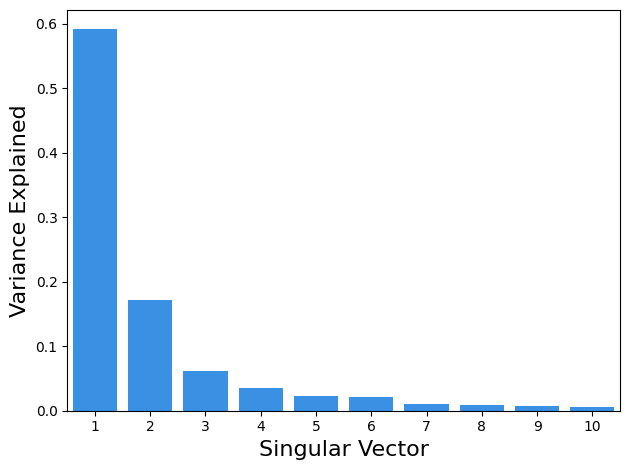

In [ ]:
import seaborn as sns
sns.barplot(x=list(range(1,11)),
            y=variance_explained[0:10], color="dodgerblue")
plt.xlabel("Singular Vector", fontsize=16)
plt.ylabel("Variance Explained", fontsize=16)
plt.tight_layout()
plt.savefig("svd_screen_plot.png", dpi=150, figsize=(8,8))

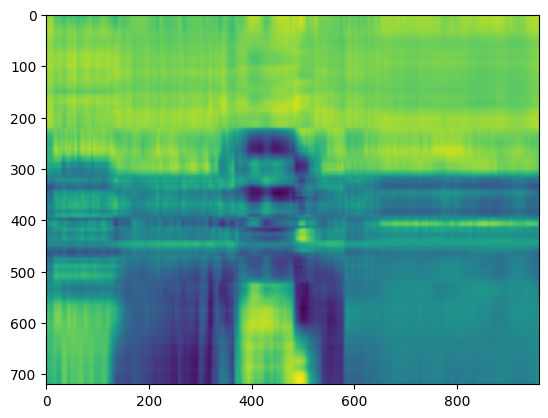

In [ ]:
# Reconstruction with top 5 singular values
num_components = 5
reconst_img_5 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components])).dot(V[:num_components, :])
plt.imshow(reconst_img_5)

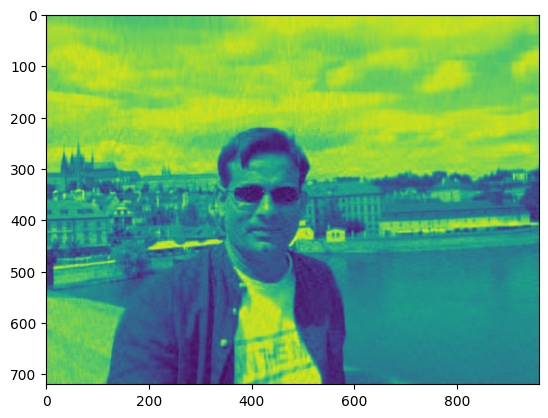

In [ ]:
# Reconstruction with top 50 singular values
num_components = 50
reconst_img_50 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components])).dot(V[:num_components, :])
plt.imshow(reconst_img_50)

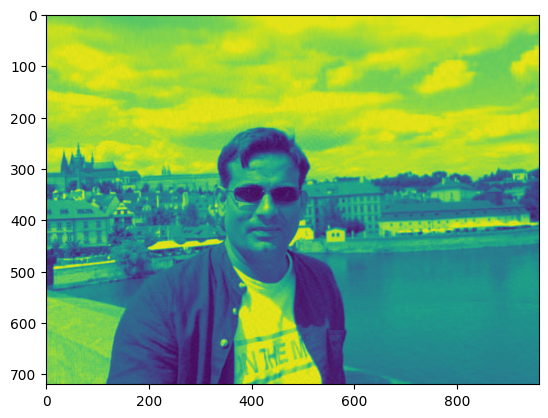

In [ ]:
# Reconstruction with top 50 singular values
num_components = 100
reconst_img_100 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components])).dot(V[:num_components, :])
plt.imshow(reconst_img_100)

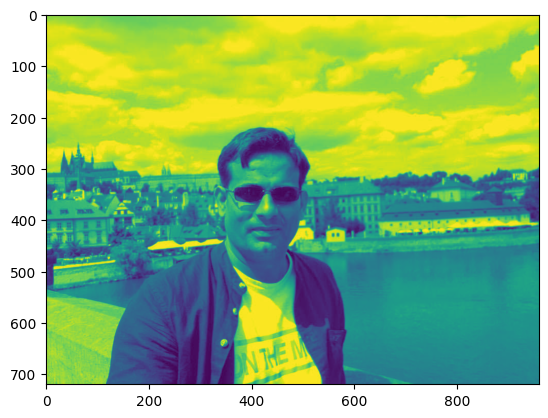

In [ ]:
# Reconstruction with top 50 singular values
num_components = 650
reconst_img_650 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components])).dot(V[:num_components, :])
plt.imshow(reconst_img_650)

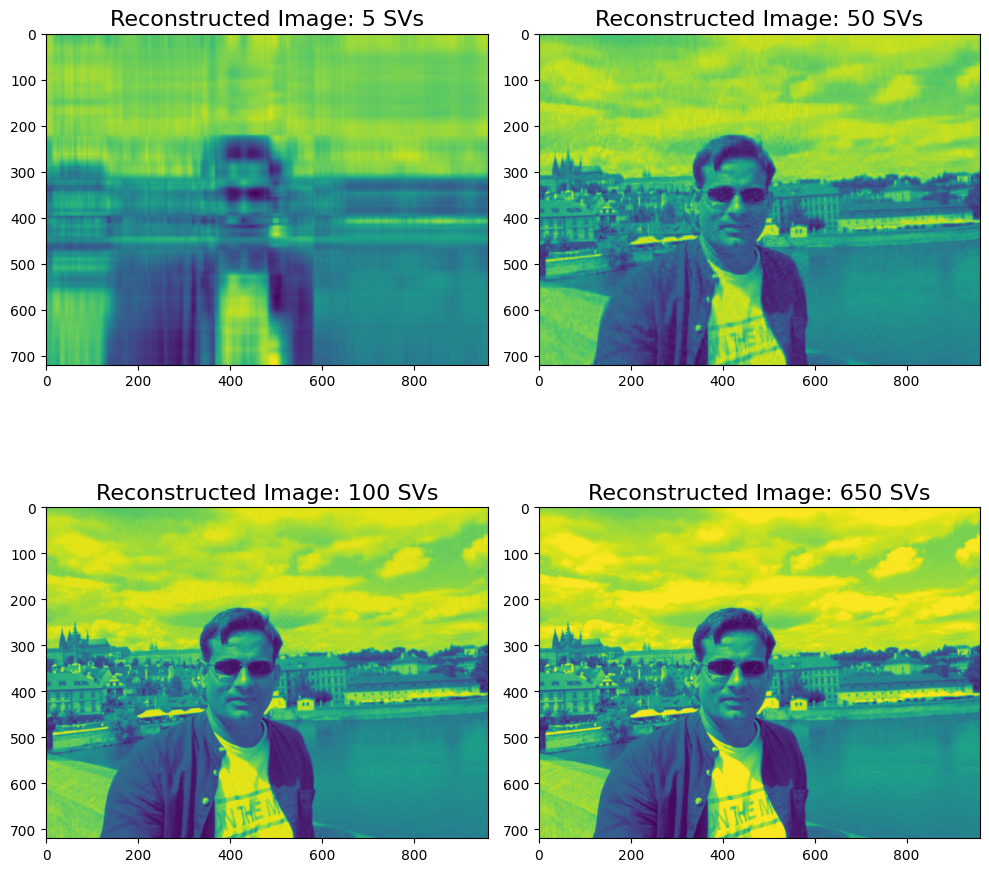

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(reconst_img_5)
axs[0, 0].set_title("Reconstructed Image: 5 SVs", size = 16)
axs[0, 1].imshow(reconst_img_50)
axs[0, 1].set_title("Reconstructed Image: 50 SVs", size = 16)
axs[1, 0].imshow(reconst_img_100)
axs[1, 0].set_title("Reconstructed Image: 100 SVs", size = 16)
axs[1, 1].imshow(reconst_img_650)
axs[1, 1].set_title("Reconstructed Image: 650 SVs", size = 16)
plt.tight_layout()